## library 2 utama yang diperlukan

In [1]:
import re, unicodedata
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# nltk.download('stopwords')
# nltk.download('punkt')

In [2]:
stop_words = set(stopwords.words('indonesian')) # stop words indonesia , untuk membuang kata2 yg kurang bermakna
# stop_words.add("wib")

In [3]:
def rmNon_Ascii(text): # membuang character ascii atau emoticon 
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

def rmURLs(text): # membuang url
    return re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)

def rmPunc(text): # membuang tanda baca
    return re.sub(r'[^\w]|_',' ',text)

def rmDigit_string(text): # membuang digit didalam string 
    return re.sub("\S*\d\S*", "", text).strip()

def rmDigitnumbers(text): # membuang digit dan angka
    return re.sub(r"\b\d+\b", " ", text)

def rmHashtag(text): # membuang hashtag
    return re.sub(r"#(\w+)", ' ', text, flags=re.MULTILINE)

def rmMention(text): # membuang mention
    return re.sub(r"@(\w+)", ' ', text, flags=re.MULTILINE)

def rmXML(text): # membuang xml character
    return re.sub("&(?:#([0-9]+)|#x([0-9a-fA-F]+)|([0-9a-zA-Z]+));"," ",text)

def rmRT(text): # membuang retweet atau RT
    return re.sub("\s*RT\s*@[^:]*"," ",text)

def lowercase(text): # casefolding menjadi huruf kecil
    return text.lower()

def rmAdditionalWs(text): # membuang spasi2 tambahan
    return re.sub('[\s]+', ' ', text)

def removeStopword(text,stop_words=stop_words): # membuang kata2 yang terdapat pada stopwords id
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return ' '.join(filtered_sentence)

In [4]:
df = pd.read_csv('tweet-data.txt',delimiter="\n",header=None) # membaca data menjadi dataframe dengan delimiter newline

In [5]:
df = df.rename(columns={0: "tweets"}) # memberi nama column header tweets

In [6]:
pd.options.display.max_colwidth = 1000 # mengoptimalkan display dataframe pada value column nya

### text preprocess

##### arah flow tahapan preprocess twit
tweet >> membuang XML char >> rmNon_Ascii >> rmRT >> rmHashtag >> rmMention >> rmURLs >> rmPunc >> rmAdditionalWs >> lowercase >> removeStopword >> rmDigitnumbers


In [7]:
df["clean_tweets"] = df.tweets.apply(lambda x: 
    rmDigitnumbers(removeStopword(lowercase(rmAdditionalWs(rmPunc(rmURLs(rmMention(rmHashtag(rmRT(rmNon_Ascii(rmXML(x))))
                                                                   ))))))))
 

In [8]:
df # show df

,tweets,clean_tweets
0,"Siang, bisa langsung ditanyakan ke Kebidanan FK UB. Terima kasih. https://t.co/5P0KDHlK9r",siang langsung kebidanan fk ub terima kasih
1,Jadwal Kegiatan Dies Natalis ke-54 UB. Catat tanggalnya dan semarakkan acaranya. https://t.co/YZpBV1YFJK,jadwal kegiatan dies natalis ub catat tanggalnya semarakkan acaranya
2,Coming soon : Rangkaian Acara Dies Natalis ke-54 Universitas Brawijaya https://t.co/5xgu0Gj828,coming soon rangkaian acara dies natalis universitas brawijaya
3,RT @UB_IO: Beasiswa AMINEF Untuk Pengajar Bahasa Inggris di UB. Deadline aplikasi tanggal 15 April 2017 https://t.co/Kg5Ked96bf @UB_Official,beasiswa aminef pengajar bahasa inggris ub deadline aplikasi tanggal april
4,RT @UB_IO: Beasiswa untuk Training dan Studi Lanjut ke Belgia. @UB_Official @UBTV_Brawijaya https://t.co/eEHYiNzbrf,beasiswa training studi belgia
5,"RT @UB_IT: Periksa Soal: cek jawaban kamu.Untuk kembali ke soal,klik nomornya.Tombol SELESAI di klik jika semua soal sudah dijawab &amp; nilai…",periksa cek klik nomornya tombol selesai klik nilai
6,"RT @UB_IT: Tes kompetensi TI selama 90 menit/90 soal (30 Excel,30 P.Point,30 Word). Soal tiap orang berbeda krn bank soal lebih dari 3000.…",tes kompetensi ti menit excel p point word orang berbeda krn bank
7,RT @UnileverIDN: Prosesi penutupan Bulan Kesehatan Gigi Nasional 2016 di FKG Univ Brawijaya #BKGN #Pepsodent @UB_Official @TanyaPepsodent @…,prosesi penutupan kesehatan gigi nasional fkg univ brawijaya
8,Selamat siang. Untuk jadwal penerimaan mahasiswa S2 bisa dilihat di https://t.co/1Uuv3lGe1O atau di… https://t.co/CYvxFREg3M,selamat siang jadwal penerimaan mahasiswa s2
9,RT @kempanrb: bersama Korpri meneguhkan netralitas dan meningkatkan profesionalisme Aparatur Sipil Negara. Selamat HUT KORPRI ke 45!! https…,korpri meneguhkan netralitas meningkatkan profesionalisme aparatur sipil negara selamat hut korpri https


In [15]:
# membuat daftar list of list untuk format corpus khusus dalam pemodelan gensim word2vec
ls_of = [df.clean_tweets[i].split() for i in range(len(df)) if df.clean_tweets[i].split() != []]

In [20]:
from gensim.models import Word2Vec # import word2vec gensim

In [22]:
model = Word2Vec(ls_of, min_count=1,size= 4,workers=3, window =3, sg = 1) # training vector kata dengan ukuran vektor 4 , 
# 1 untuk skip gram model jika 0 CBOW model, dengan window 3 kata pada sebuah kalimat , min_count 1 kata pada kalimat , 
# ls_of list of list yang akan dijadikan corpus 

In [23]:
# summary dari vocabulary corpus
print(model)

words = list(model.wv.vocab)
print(words[0:5])

Word2Vec(vocab=192, size=4, alpha=0.025)
['siang', 'langsung', 'kebidanan', 'fk', 'ub']


In [28]:
# contoh mengakses vector untuk satu kata sebagai referensi
print(model.wv['ub'])

[ 0.11884184  0.12117017 -0.02563052 -0.01053343]


In [30]:
from sklearn.decomposition import PCA # mendapatkan fungsi PCA

# Plotting helpers
import matplotlib
import matplotlib.pyplot as plt

In [53]:
# fitting sebuah 2d PCA model ke dalam vector
X = model.wv[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

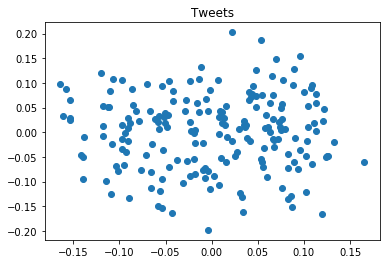

In [54]:
# membuat sebuah plot dari proyeksi corpus dalam 2 dimensi setelah direduksi dari 4 dimensi vector
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
plt.show()

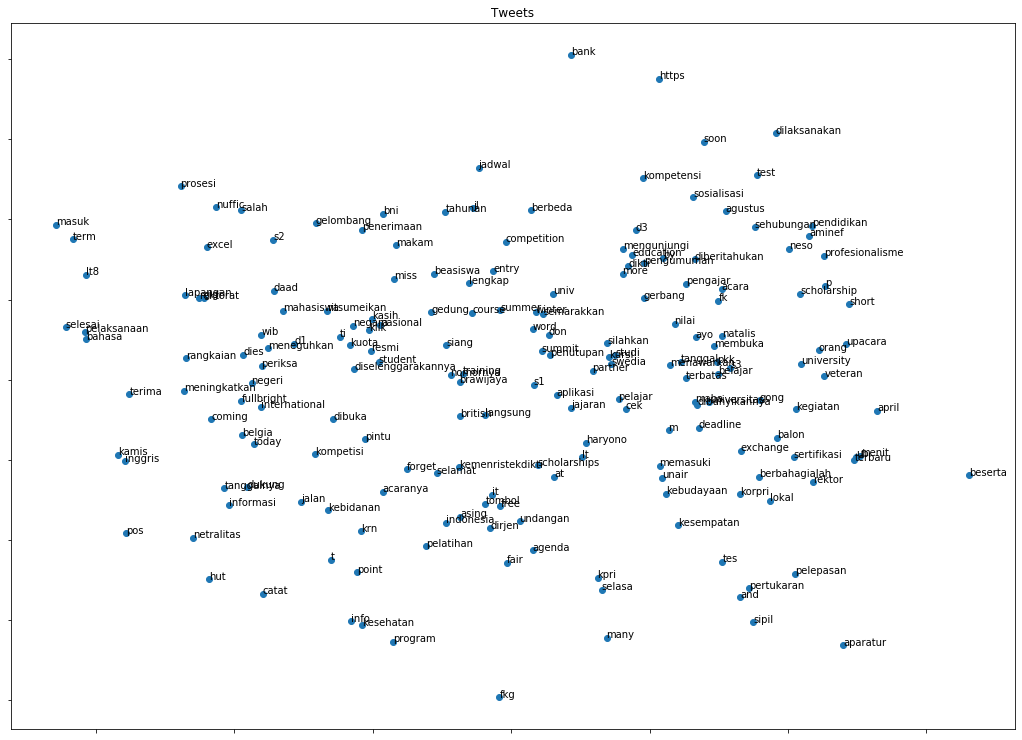

In [55]:
# Memperjelas plotting hubungan kedekatan antar kata dari training word2vec
fig, ax = plt.subplots(figsize=(18, 13))
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks

words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()